In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv(r"D:\5.MBAN6110 Data Science I\games.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


drop 146 rows

Check null if any

In [36]:
df.isnull().sum(axis=1).sum()

0

drop duplicate if any

In [37]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [39]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [40]:
df['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [41]:
df.groupby('rating')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2).sort_values(by='positive_ratio', ascending=False)

,positive_ratio,user_reviews,price_final,price_original,discount
rating,,,,,
Overwhelmingly Positive,96.24,18822.74,11.77,12.40,4.26
Positive,91.21,21.60,6.53,7.21,6.79
Very Positive,88.79,3973.13,10.14,10.72,4.41
Mostly Positive,74.55,1016.48,8.98,9.72,6.54
Mixed,57.65,641.18,8.57,9.11,5.70
Mostly Negative,31.28,313.98,8.05,8.46,4.38
Overwhelmingly Negative,14.93,3855.93,8.60,8.71,3.57
Very Negative,13.69,138.95,9.37,9.58,1.41
Negative,11.85,18.35,8.20,8.68,5.58


See if devices matter something

 only 2 doesnt have steam deck. skip the column

In [48]:
df[['win', 'mac', 'linux', 'steam_deck']].apply(pd.value_counts)

,win,mac,linux,steam_deck
False,795,37551,41499,2
True,49708,12952,9004,50501


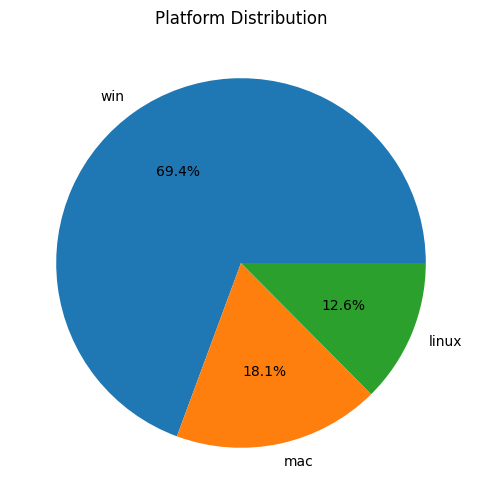

In [49]:
platform_counts = df[['win', 'mac', 'linux']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

In [42]:
df.groupby('win')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)

,positive_ratio,user_reviews,price_final,price_original,discount
win,,,,,
False,92.06,108.28,5.26,5.46,3.67
True,76.79,1802.84,8.60,9.23,5.75


In [43]:
df.groupby('mac')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)


,positive_ratio,user_reviews,price_final,price_original,discount
mac,,,,,
False,76.26,1329.11,8.59,9.25,6.12
True,79.29,3072.29,8.43,8.94,4.54


In [44]:
df.groupby('linux')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)

,positive_ratio,user_reviews,price_final,price_original,discount
linux,,,,,
False,76.45,1400.02,8.60,9.22,5.86
True,79.73,3509.77,8.33,8.92,5.04


In [45]:
df.groupby('steam_deck')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2)

,positive_ratio,user_reviews,price_final,price_original,discount
steam_deck,,,,,
False,86.00,5987.0,17.50,17.50,0.00
True,77.03,1776.0,8.55,9.17,5.72


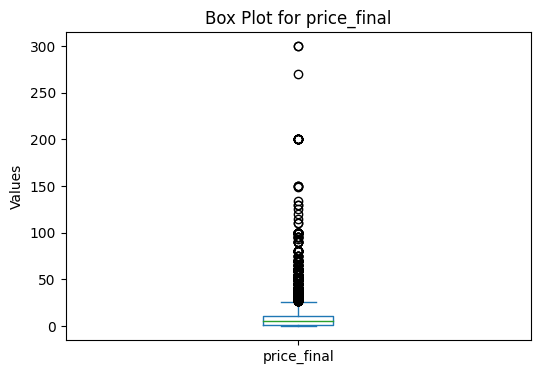

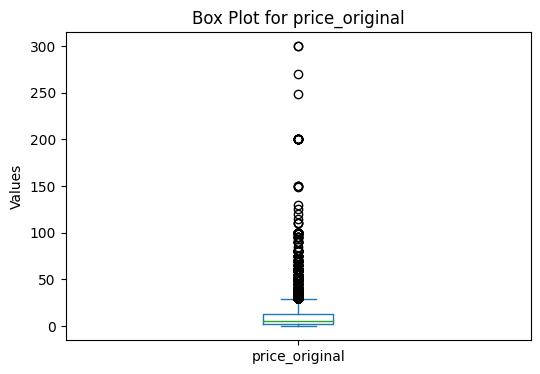

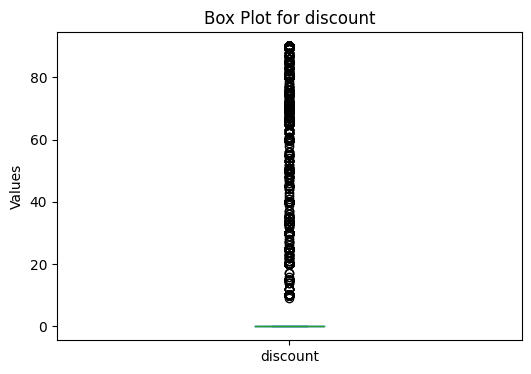

In [46]:
import matplotlib.pyplot as plt

# Iterate over columns
for column in df.columns:
    # Skip non-numeric columns
    if not df[column].dtype in [float, int]:
        continue
    
    # Create a box plot
    plt.figure(figsize=(6, 4))
    df[column].plot.box()
    
    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()


remove outliers.     
92.6% left.  

In [47]:
df = df[df['carat'] <= 3]
df = df[(df['depth'] >= 55) & (df['depth'] <= 70)]
df = df[(df['table'] >= 55) & (df['table'] <= 65)]
df = df[(df['x'] > 3) & (df['x'] <= 9)]
df = df[(df['y'] > 2) & (df['y'] < 20)]
df = df[(df['z'] <= 10) & (df['z'] > 0)]

KeyError: 'carat'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49959 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49959 non-null  float64
 1   cut      49959 non-null  object 
 2   color    49959 non-null  object 
 3   clarity  49959 non-null  object 
 4   depth    49959 non-null  float64
 5   table    49959 non-null  float64
 6   price    49959 non-null  int64  
 7   x        49959 non-null  float64
 8   y        49959 non-null  float64
 9   z        49959 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.2+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,49959.000000,49959.000000,49959.000000,49959.000000,49959.000000,49959.000000,49959.000000
mean,0.804806,61.715871,57.680626,3988.156468,5.751865,5.753314,3.549984
std,0.470139,1.403795,1.988581,3997.198872,1.115476,1.107930,0.689371
min,0.200000,55.000000,55.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,972.000000,4.730000,4.740000,2.920000
50%,0.710000,61.800000,57.000000,2490.000000,5.720000,5.730000,3.540000
75%,1.050000,62.500000,59.000000,5410.500000,6.550000,6.550000,4.040000
max,3.000000,70.000000,65.000000,18823.000000,8.990000,8.970000,6.160000
